<a href="https://colab.research.google.com/github/Mohammad-H-Zahrawi/Challenges-Kaggle/blob/main/Twitter%20Sentiment%20Analysis-Batch/twitter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans

nltk.download('stopwords')
nltk.download('wordnet')
newStopWords = stopwords.words('english')

df=pd.read_csv('/content/drive/MyDrive/twitter/train1.csv', encoding='ISO-8859-1')
df2=pd.read_csv('/content/drive/MyDrive/twitter/test1.csv', encoding='ISO-8859-1')
test_ids = df2['id']
X_test = df2.copy()

df = df.drop(columns=['id', 'user', 'date', 'flag'])
df2 = df2.drop(columns=['id', 'user', 'date', 'flag'])

# Text preprocessing functions
from bs4 import BeautifulSoup

def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()


def remove_urls(text):
    clean_text = re.sub(r'http\S+', '', text)
    return clean_text

def convert_to_lowercase(text):
    return text.lower()

def replace_chat_words(text):
    chat_words = {
        "BRB": "Be right back",
        "BTW": "By the way",
        "OMG": "Oh my God/goodness",
        "TTYL": "Talk to you later",
        "OMW": "On my way",
        "SMH/SMDH": "Shaking my head/shaking my darn head",
        "LOL": "Laugh out loud",
        "TBD": "To be determined",
        "IMHO/IMO": "In my humble opinion",
        "HMU": "Hit me up",
        "IIRC": "If I remember correctly",
        "LMK": "Let me know",
        "OG": "Original gangsters (used for old friends)",
        "FTW": "For the win",
        "NVM": "Nevermind",
        "OOTD": "Outfit of the day",
        "Ngl": "Not gonna lie",
        "Rq": "real quick",
        "Iykyk": "If you know, you know",
        "Ong": "On god (I swear)",
        "YAAAS": "Yes!",
        "Brt": "Be right there",
        "Sm": "So much",
        "Ig": "I guess",
        "Wya": "Where you at",
        "Istg": "I swear to god",
        "Hbu": "How about you",
        "Atm": "At the moment",
        "Asap": "As soon as possible",
        "Fyi": "For your information"
    }
    for word, expanded_form in chat_words.items():
        text = text.replace(word, expanded_form)
    return text

def remove_punctuation(text):
    clean_text = ''.join(ch for ch in text if ch not in string.punctuation)
    return clean_text
import nltk

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in newStopWords]
    return ' '.join(filtered_words)

def remove_whitespace(text):
    return text.strip()

def remove_special_characters(text):
    clean_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return clean_text


def preprocess_text(text):
    text = remove_html_tags(text)
    text = remove_urls(text)
    text = convert_to_lowercase(text)
    text = replace_chat_words(text)
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = remove_whitespace(text)
    text = remove_special_characters(text)

    return text

df['text'] = df['text'].apply(preprocess_text)
df2['text'] = df2['text'].apply(preprocess_text)


<ipython-input-3-a6c8a9fde015>:38: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
<ipython-input-3-a6c8a9fde015>:38: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [ ]:
def print_evaluation_scores(y_val, predicted):
    print('ROC AUC:',roc_auc_score(y_val, predicted))
    print('Accuracy:',accuracy_score(y_val, predicted))
    print('Precision:',average_precision_score(y_val, predicted,average='weighted'))
    print('Recall:',recall_score(y_val, predicted,average='weighted'))
    print('F1 Score:',f1_score(y_val, predicted, average='weighted'))


# Word Embedding

### Normal tf-idf

In [ ]:
# TFIDF1
#split data
X = df['text']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
test = vectorizer.transform(df2['text'])

### tf-idf n-grams stacking


In [ ]:
X = df['text']
y = df['target']

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 1),
    max_features=1000)
word_vectorizer.fit(X)
train_word_features = word_vectorizer.transform(X)
test_word_features = word_vectorizer.transform(df2['text'])

char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    ngram_range=(2, 3),
    max_features=5000)
char_vectorizer.fit(X)

train_char_features = char_vectorizer.transform(X)
test_char_features = char_vectorizer.transform(df2['text'])

train_features = hstack([train_char_features, train_word_features])
test_features = hstack([test_char_features, test_word_features])

X_train, X_test, y_train, y_test = train_test_split(train_features, y, test_size=0.3, random_state=42)

# Models

### 1. KMeans

In [ ]:
#kmeasn without scaler
from nltk.util import ngrams
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
kmean = KMeans(n_clusters=2,random_state=7)
kmean.fit(X_train)

print('means logistic')
y_train_predicted_label = kmean.predict(X_train)
print_evaluation_scores(y_train, kmean.predict(X_train))
print('\n')
print('means logistic')
y_test_predicted_label = kmean.predict(X_test)
print_evaluation_scores(y_test, kmean.predict(X_test))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


means logistic
ROC AUC: 0.48458643979785415
Accuracy: 0.48468694084954517
Precision: 0.49332617716500554
Recall: 0.48468694084954517
F1 Score: 0.3879650739633911


means logistic
ROC AUC: 0.48345754542301056
Accuracy: 0.481474609375
Precision: 0.4955464938947786
Recall: 0.481474609375
F1 Score: 0.38488180448693143


In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=42)
X_train = svd.fit_transform(X_train)
X_test = svd.fit_transform(X_test)

#Kmeans with scaler
from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler(with_mean=False, with_std =False)
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler(with_centering=False)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# K-means clustering
kmeans1 = KMeans(n_clusters=2)
kmeans1.fit(X_train)
# Predict cluster labels
y_train_pred = kmeans1.predict(X_train)
y_test_pred = kmeans1.predict(X_test)


# Evaluate clustering performance
accuracy_train = f1_score(y_train, y_train_pred)
accuracy_test = f1_score(y_test, y_test_pred)
print("Training f1_score:", accuracy_train)
print("Test f1_score:", accuracy_test)

inverse_ytrain_labels  = [1 if x==0 else 0 for x in y_train_pred]
inverse_ytest_labels  = [1 if x==0 else 0 for x in y_test_pred]
accuracy_train = f1_score(y_train, inverse_ytrain_labels)
accuracy_test = f1_score(y_test, inverse_ytest_labels)
print("Training f1_score inverse labels:", accuracy_train)
print("Test f1_score inverse labels", accuracy_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training f1_score: 0.13570591958329395
Test f1_score: 0.13494274218508204
Training f1_score inverse labels: 0.6548070610124743
Test f1_score inverse labels 0.6574904636507021


In [ ]:
len(y_train_pred)

921599

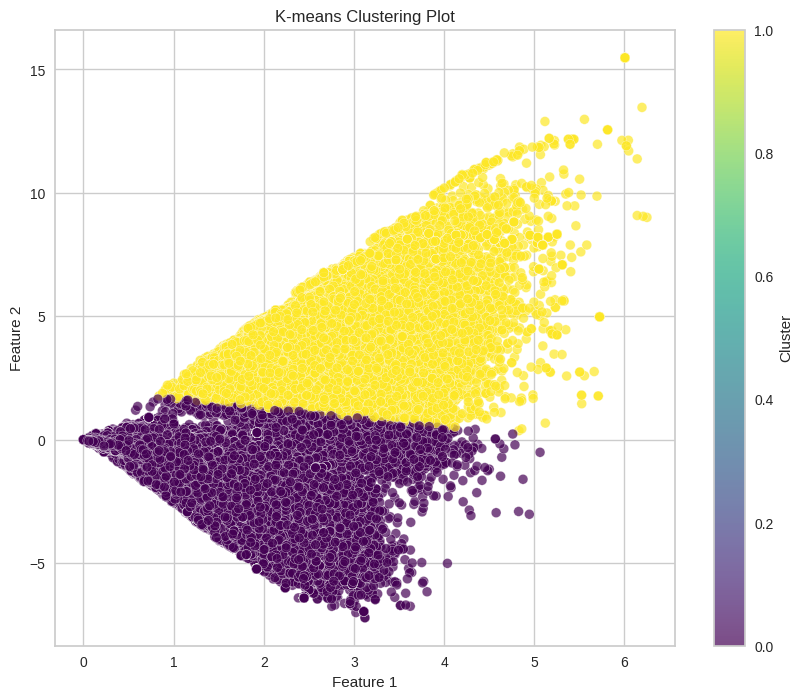

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_pred, cmap='viridis', s=50, alpha=0.7, edgecolors='w')
plt.title('K-means Clustering Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

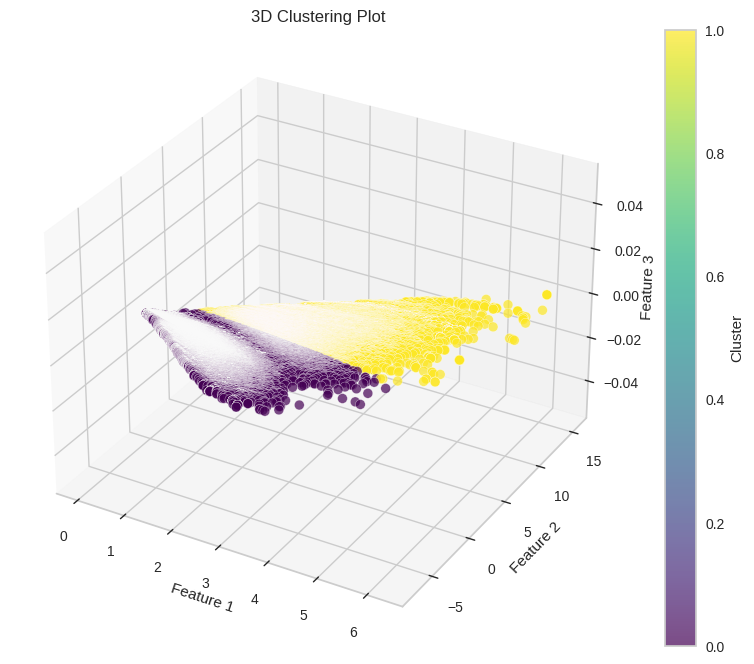

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train_pred, cmap='viridis', s=50, alpha=0.7, edgecolors='w')
ax.set_title('3D Clustering Plot')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.colorbar(ax.collections[0], ax=ax, label='Cluster')
plt.grid(True)
plt.show()

### 2. Bernoli

In [ ]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(X_train, y_train)

print('train logistic')
y_train_predicted_label = model.predict(X_train)
print_evaluation_scores(y_train, y_train_predicted_label)
print('\n')
print('test logistic')
y_test_predicted_label = model.predict(X_test)
print_evaluation_scores(y_test, y_test_predicted_label)

train logistic
ROC AUC: 0.7321558223238168
Accuracy: 0.7321536441875617
Precision: 0.6691787580744545
Recall: 0.7321536441875617
F1 Score: 0.7321534882207222


test logistic
ROC AUC: 0.7308685239911894
Accuracy: 0.7308723958333333
Precision: 0.6705226668187596
Recall: 0.7308723958333333
F1 Score: 0.7308727646772688


### 3. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logistic = LogisticRegression(solver='saga', C=0.7 , max_iter=100)
# cv = cross_val_score(logistic, X_train, y_train, cv=5, n_jobs=-1, scoring=rs)
logistic.fit(X_train, y_train.values)
print('train logistic')
y_train_predicted_label = logistic.predict(X_train)
print_evaluation_scores(y_train, y_train_predicted_label)
print('\n')
print('test logistic')
y_test_predicted_label = logistic.predict(X_test)
print_evaluation_scores(y_test, y_test_predicted_label)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


train logistic
ROC AUC: 0.774404098248823
Accuracy: 0.7743788705062368
Precision: 0.7094921297565348
Recall: 0.7743788705062368
F1 Score: 0.7743200873344339


test logistic
ROC AUC: 0.7707117696223831
Accuracy: 0.77078125
Precision: 0.7081697048290188
Recall: 0.77078125
F1 Score: 0.770717771281185


In [ ]:
print(classification_report(y_test, y_test_predicted_label))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77    152915
           1       0.76      0.79      0.78    154285

    accuracy                           0.77    307200
   macro avg       0.77      0.77      0.77    307200
weighted avg       0.77      0.77      0.77    307200



### 4. Naive Bayes

In [ ]:
#naive bayes
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
# cv = cross_val_score(nb_classifier, X_train, y_train, cv=5, n_jobs=-1, scoring=rs)
nb_classifier.fit(X_train, y_train.values)

print('train naive')
y_train_predicted_label = nb_classifier.predict(X_train)
print_evaluation_scores(y_train, y_train_predicted_label)
print('\n')
print('test naive')
y_test_predicted_label = nb_classifier.predict(X_test)
print_evaluation_scores(y_test, y_test_predicted_label)

train naive
ROC AUC: 0.7306002047504995
Accuracy: 0.7305869567340356
Precision: 0.666920973225414
Recall: 0.7305869567340356
F1 Score: 0.7305683135509274


test naive
ROC AUC: 0.7309566501250438
Accuracy: 0.7309895833333333
Precision: 0.6699289971906739
Recall: 0.7309895833333333
F1 Score: 0.7309718709403611


### 5. XGBoost

In [ ]:
import xgboost as xgb
xgbmodel = xgb.XGBClassifier(objective='binary:logistic', random_state=42, n_estimators=1000, max_depth=8, learning_rate=0.1)
xgbmodel.fit(X_train, y_train.values)

print('train xgboost')
y_train_predicted_label = xgbmodel.predict(X_train)
print_evaluation_scores(y_train, y_train_predicted_label)
print('\n')
print('test xgboost')
y_test_predicted_label = xgbmodel.predict(X_test)
print_evaluation_scores(y_test, y_test_predicted_label)

train xgboost
ROC AUC: 0.7702570359329914
Accuracy: 0.7702438913236668
Precision: 0.7011864045039939
Recall: 0.7702438913236668
F1 Score: 0.7696227985000379


test xgboost
ROC AUC: 0.7522211004493864
Accuracy: 0.752470703125
Precision: 0.6860256957077864
Recall: 0.752470703125
F1 Score: 0.7518219627676342


In [ ]:
import xgboost as xgb
xgbmodel = xgb.XGBClassifier(objective='binary:logistic', random_state=42, n_estimators=100, max_depth=8, learning_rate=0.1)
xgbmodel.fit(X_train, y_train.values)

print('train xgboost')
y_train_predicted_label = xgbmodel.predict(X_train)
print_evaluation_scores(y_train, y_train_predicted_label)
print('\n')
print('test xgboost')
y_test_predicted_label = xgbmodel.predict(X_test)
print_evaluation_scores(y_test, y_test_predicted_label)

train xgboost
ROC AUC: 0.7191683601866045
Accuracy: 0.7191348948946342
Precision: 0.6474508101520294
Recall: 0.7191348948946342
F1 Score: 0.7141305111806515


test xgboost
ROC AUC: 0.7146531202342559
Accuracy: 0.7153125
Precision: 0.6460388170451219
Recall: 0.7153125
F1 Score: 0.7101882753397181


### 6. catboost


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.0 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score, KFold
from catboost import CatBoostClassifier, Pool
catBoost = CatBoostClassifier(iterations=50, depth=8, learning_rate=0.3,
                           loss_function='Logloss', custom_metric=['F1'], random_seed=42)


In [ ]:
catBoost.fit(X_train, y_train)  # Use eval_set for custom metrics during training

0:	learn: 0.6706154	total: 5.99s	remaining: 4m 53s
1:	learn: 0.6561701	total: 12.2s	remaining: 4m 52s
2:	learn: 0.6465444	total: 17.4s	remaining: 4m 32s
3:	learn: 0.6387425	total: 22.4s	remaining: 4m 18s
4:	learn: 0.6319754	total: 29.3s	remaining: 4m 23s
5:	learn: 0.6264164	total: 34.2s	remaining: 4m 11s
6:	learn: 0.6216738	total: 39.6s	remaining: 4m 3s
7:	learn: 0.6177729	total: 45.8s	remaining: 4m
8:	learn: 0.6142828	total: 48.2s	remaining: 3m 39s
9:	learn: 0.6111996	total: 50.5s	remaining: 3m 22s
10:	learn: 0.6080600	total: 52.9s	remaining: 3m 7s
11:	learn: 0.6049525	total: 55.3s	remaining: 2m 55s
12:	learn: 0.6023550	total: 59s	remaining: 2m 48s
13:	learn: 0.5997487	total: 1m 2s	remaining: 2m 40s
14:	learn: 0.5969152	total: 1m 4s	remaining: 2m 31s
15:	learn: 0.5947734	total: 1m 7s	remaining: 2m 22s
16:	learn: 0.5928032	total: 1m 9s	remaining: 2m 14s
17:	learn: 0.5907568	total: 1m 12s	remaining: 2m 8s
18:	learn: 0.5887384	total: 1m 16s	remaining: 2m 4s
19:	learn: 0.5867367	total: 1m

In [ ]:
print('train catboost')
y_train_predicted_label = catBoost.predict(X_train)
print_evaluation_scores(y_train, y_train_predicted_label)
print('\n')
print('test catboost')
y_test_predicted_label = catBoost.predict(X_test)
print_evaluation_scores(y_test, y_test_predicted_label)

train catboost
ROC AUC: 0.7261790513686613
Accuracy: 0.7261553018178188
Precision: 0.6560440501004814
Recall: 0.7261553018178188
F1 Score: 0.7237203415421813


test catboost
ROC AUC: 0.7253890819926749
Accuracy: 0.725849609375
Precision: 0.6577930478106204
Recall: 0.725849609375
F1 Score: 0.7234463040629291


### 7. LightGBM

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
train_data = lgb.Dataset(X_train, label=y_train)
bst = lgb.train(train_set = train_data, params={})

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 16.310717 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 168836
[LightGBM] [Info] Number of data points in the train set: 921599, number of used features: 1000
[LightGBM] [Info] Start training from score 0.499874


In [ ]:
y_train_predicted_label = bst.predict(X_train)
y_train_predicted_label = [1 if x >= 0.5 else 0 for x in y_train_predicted_label]
print_evaluation_scores(y_train, y_train_predicted_label)
print('\n')
print('test xgboost')

y_test_predicted_label = bst.predict(X_test)
y_test_predicted_label = [1 if x >= 0.5 else 0 for x in y_test_predicted_label]
print_evaluation_scores(y_test, y_test_predicted_label)

ROC AUC: 0.7365353088036408
Accuracy: 0.7365155561149698
Precision: 0.6665464214088124
Recall: 0.7365155561149698
F1 Score: 0.7348998597069959


test xgboost
ROC AUC: 0.7333459703680092
Accuracy: 0.73373046875
Precision: 0.6660303729364484
Recall: 0.73373046875
F1 Score: 0.7320987984629042


# Save Model

In [ ]:
test_ids

0         1136227
1          738556
2         1289784
3         1419520
4         1178091
           ...   
255995     941517
255996     161069
255997     197395
255998     828595
255999    1090600
Name: id, Length: 256000, dtype: int64

In [ ]:
#save model


results=pd.DataFrame({'id': test_ids, 'target':inverse_ytrain_labels})
results.to_csv('clustering10Stemming.csv',index=False)

#END